<h1 style="text-align: center; color:#900603">Kaggle - Credit Card Fraud Detection</h1>

## <span style="color:#2832C2">1. Introduction:</span>

#### This jupyter is to create machine learning model in order to detect fraud transactions.
#### The problem is datasets of fraud and not-fraud transactions are always imbalanced. Any machine learning models trained on those datasets have bias towards majority classes.
#### Therefore, imbalanced-data handling is essential before training this kind of datasets. 
#### SMOTE and Logistic Regression are used in this project.
#### The dataset is from [Kaggle - Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).
<br>

## <span style="color:#2832C2">2. Import necessary libraries:</span>

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

## <span style="color:#2832C2">3. Load the data:</span>

In [5]:
credit_card_transation = pd.read_csv('creditcard.csv')

In [6]:
# We keep the original data in credit_card_transation and create a dupplicate data
# We then work on the duplicate data.

data = credit_card_transation
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## <span style="color:#2832C2">4. Check missing values:</span>

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### So there is no null values in the data. <br>

## <span style="color:#2832C2">5. Standardization:</span>

In [8]:
standard_scaler = StandardScaler()

# The values in 'Amount' column are significantly different from order column's.
# Therefore, we have to standardize 'Amount' column.
data['Amount'] = standard_scaler.fit_transform(data['Amount'].values.reshape((-1, 1)))

# Drop 'Time' column because it's not necessary in our prediction.
data = data.drop(['Time'], axis=1)

data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


## <span style="color:#2832C2">6. Check counts of class 0 and class 1:</span>

Number of normal transactions: 284315 (account for: 99.83 %)
Number of fraud transactions: 492 (account for: 0.17 %)


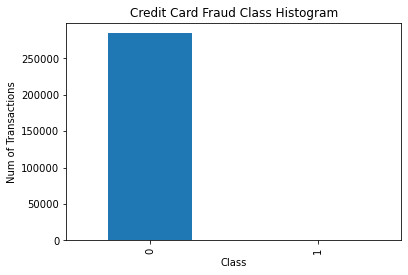

In [9]:
count_class = pd.value_counts(data['Class'], sort = True).sort_index()
count_class.plot(kind = 'bar')

plt.title("Credit Card Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Num of Transactions")

print(f'Number of normal transactions: {count_class[0]} (account for: {round(count_class[0] / (count_class[0]+count_class[1]) * 100, 2)} %)')
print(f'Number of fraud transactions: {count_class[1]} (account for: {round(count_class[1] / (count_class[0]+count_class[1]) * 100, 2)} %)')

#### Obviously, the data is imbalanced. So that, we have to handle this issue before training data. 
#### But firstly, let's just apply a machine learning algorithm on the original data and see if it works well,
#### Afterward, we will use a resampling method before training out model and see if handling imbalanced-data provides us a better model.
<br>

## <span style="color:#2832C2">7. Create X and y:</span>

In [10]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [11]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [12]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


## <span style="color:#2832C2">8. Split data into training and testing set:</span>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
print(f'Number of transactions in training set: {X_train.shape[0]}')
print(f'Number of transactions in testing set: {X_test.shape[0]}')
print(f'Number of transactions in whole set: {X.shape[0]}')

Number of transactions in training set: 227845
Number of transactions in testing set: 56962
Number of transactions in whole set: 284807


In [15]:
print(f"Counts of fraud transactions: {y_train.value_counts()[1]}")
print(f"Counts of normal transactions: {y_train.value_counts()[0]}")

Counts of fraud transactions: 391
Counts of normal transactions: 227454


## <span style="color:#2832C2">9. Using Logistic Regression on the original dataset:</span>

In [16]:
LR_original_data = LogisticRegression()

In [17]:
LR_original_data.fit(X_train, y_train.values.ravel())

LogisticRegression()

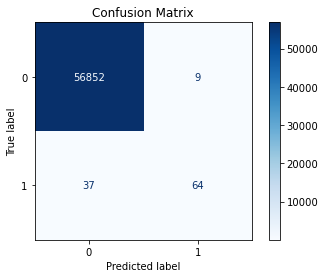

In [18]:
plot_confusion_matrix(LR_original_data, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [19]:
y_pred = LR_original_data.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     56861
           1     0.8767    0.6337    0.7356       101

    accuracy                         0.9992     56962
   macro avg     0.9380    0.8168    0.8676     56962
weighted avg     0.9991    0.9992    0.9991     56962



#### Although we earn high score in accuracy of 99.92%, this model is not actually good.
#### The problem is the figure for recall of Class 1 is 63.37%. That means nearly 37% of fraud transactions are predicted to be normal. And that is clearly bad if those transactions steal tons of money from customers.
#### We definitely want the recall of Class 1 in this case get higher.

## <span style="color:#2832C2">10. Handle imbalanced-data by using SMOTE before training:</span>

### There are several methods of resampling skewed data:
1. #### Undersampling: The undersampling technique will reduce the data samples in the majority class to have the same number as the minority class.
2. #### Oversampling: The oversampling technique will increase the data samples in the minority class by duplicating in order to have the same number as the majority class.
3. #### Synthetic Minority Oversampling Technique (SMOTE): The SMOTE technique will balance the dataset classes by generating more samples for minority class based on minority's existences. 

#### In this project, we choose SMOTE method.<br>Undersampling truncates too many data.<br>Oversampling creates too many duplicated data.<br>Therefore, we consider SMOTE is the best choise in this case.<br>

In [20]:
sm = SMOTE(random_state=2)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [21]:
print(f"Before OverSampling, counts of fraud transactions: {y_train.value_counts()[1]}")
print(f"Before OverSampling, counts of normal transactions: {y_train.value_counts()[0]}")
print("-------------------------------------")
print(f"After OverSampling, counts of fraud transactions: {y_train_res.value_counts()[1]}")
print(f"After OverSampling, counts of normal transactions: {y_train_res.value_counts()[0]}")

Before OverSampling, counts of fraud transactions: 391
Before OverSampling, counts of normal transactions: 227454
-------------------------------------
After OverSampling, counts of fraud transactions: 227454
After OverSampling, counts of normal transactions: 227454


In [22]:
LR_res_data = LogisticRegression()

In [23]:
LR_res_data.fit(X_train_res, y_train_res.values.ravel())

LogisticRegression()

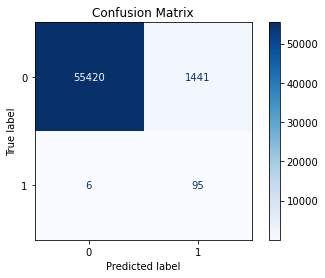

In [24]:
plot_confusion_matrix(LR_res_data, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [25]:
y_pred_2 = LR_res_data.predict(X_test)

print(classification_report(y_test, y_pred_2, digits=4))

              precision    recall  f1-score   support

           0     0.9999    0.9747    0.9871     56861
           1     0.0618    0.9406    0.1161       101

    accuracy                         0.9746     56962
   macro avg     0.5309    0.9576    0.5516     56962
weighted avg     0.9982    0.9746    0.9856     56962



#### The accuracy is still great, account for 97.5%.
#### And the recall is much more improved, get approximately 94%. That means only 6% of fraud transactions are mistakenly detected.